# Assignment 3



# Setup your environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  
from fbprophet import Prophet ## <----- new import
%matplotlib inline
## pandas print columns/rows option (100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## set the styling for seaborn (white)
sns.set_style("dark")

# Bring in the Sales Dataset

The dataset an can be found at the following url:

> `http://www.cse.ohio-state.edu/~hwshen/Melbourne/Data/Superstore.xlsx`

In [2]:
dd = pd.read_excel("http://www.cse.ohio-state.edu/~hwshen/Melbourne/Data/Superstore.xlsx");



 # Question 0:  Crosstab and Heatmap of Product Sub-Category and Region (Sales)
 
 Hint:  We saw this in the Seaborn plotting notebook, and be sure to check out the help
 
 - Product Sub-Category in the rows
 - Region in the columns
 - the cell values should be the count of records  
 
 
 Hint 2:  If you are not sure about your results, try to look at the data in Excel and Pivot tables there

In [3]:
pd.crosstab(index=dd['Product Sub-Category'],columns = dd['Region'], aggfunc="count", values= dd.Sales)

Region,Central,East,South,West
Product Sub-Category,,,,
Appliances,158,120,103,111
Binders and Binder Accessories,332,250,209,237
Bookcases,69,41,35,61
Chairs & Chairmats,158,114,78,90
Computer Peripherals,273,201,186,186
Copiers and Fax,32,22,18,26
Envelopes,82,70,52,68
Labels,98,70,86,75
Office Furnishings,307,194,181,201


In [9]:
pd.crosstab(index=dd['Product Sub-Category'],columns = dd['Region'], aggfunc="sum", values= dd.Sales)

Region,Central,East,South,West
Product Sub-Category,,,,
Appliances,169845.36,134585.81,74777.71,77514.20
Binders and Binder Accessories,188990.69,251266.94,107957.32,90367.14
Bookcases,117583.29,84302.31,83301.50,222307.39
Chairs & Chairmats,327909.58,380187.76,161498.55,294988.27
Computer Peripherals,131915.62,133951.95,133718.62,91254.34
Copiers and Fax,214366.22,164600.07,78565.08,203680.56
Envelopes,29006.31,53071.97,15017.21,50825.54
Labels,7109.35,6233.37,5481.32,4625.86
Office Furnishings,135556.38,94984.15,87378.65,126704.85


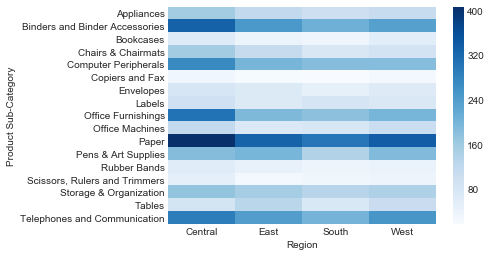

In [4]:
sns.heatmap(q0,cmap='Blues')

In [6]:
dd.shape

(9426, 24)

# Question 1:  Crosstab and Heatmap total Sales by Sub-Category and Region

- Product Sub-Category in the rows
- Region in the columns
- The cells should be the sum of sales

In [79]:
q1 = pd.crosstab(index=dd['Product Sub-Category'],columns = dd['Region'], aggfunc="sum", values= dd.Sales)

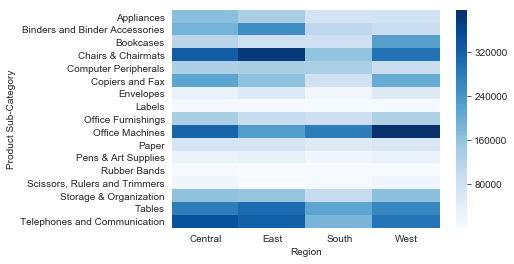

In [80]:
sns.heatmap(q1,cmap='Blues')

# Question 2: Total Sales of `Chairs & Chairmats`  by `Order Date`

In [13]:
dd.loc[dd['Product Sub-Category']=='Chairs & Chairmats'].groupby('Order Date').sum()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
Order Date,,,,,,,,,,,
2010-01-02,10545,0.07,392.71,93.80,136,1.25,20354,-1988.68800,47,5322.25,75074
2010-01-04,24953,0.06,350.98,30.00,915,0.61,77803,-489.41560,1,346.52,86356
2010-01-05,48566,0.16,245.79,44.07,3041,1.13,128022,-161.50200,12,268.81,179940
2010-01-06,20001,0.01,150.98,30.00,799,0.74,29915,131.38200,6,958.46,89909
2010-01-12,43146,0.08,701.97,69.00,4200,1.16,100989,3143.72250,14,4922.17,180676
2010-01-14,24202,0.06,320.98,58.95,3149,0.57,83440,971.62200,6,1952.43,89716
2010-01-18,26223,0.05,350.99,39.00,1972,0.55,19090,1469.72760,6,2130.04,91550
2010-01-21,22600,0.04,355.98,58.92,1989,0.64,84117,882.93000,8,2748.21,90000
2010-01-24,26250,0.20,476.80,48.98,2563,0.00,66725,1335.96040,38,8428.89,118431


In [50]:
dd2.head()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
Order Date,,,,,,,,,,,
2010-01-02,10545,0.07,392.71,93.80,136,1.25,20354,-1988.6880,47,5322.25,75074
2010-01-04,24953,0.06,350.98,30.00,915,0.61,77803,-489.4156,1,346.52,86356
2010-01-05,48566,0.16,245.79,44.07,3041,1.13,128022,-161.5020,12,268.81,179940
2010-01-06,20001,0.01,150.98,30.00,799,0.74,29915,131.3820,6,958.46,89909
2010-01-12,43146,0.08,701.97,69.00,4200,1.16,100989,3143.7225,14,4922.17,180676


# Question 3: Create a Timeseries plot (line chart) Showing Chairs & Chairmats Sales by Date

Use the dataset created in Question 2

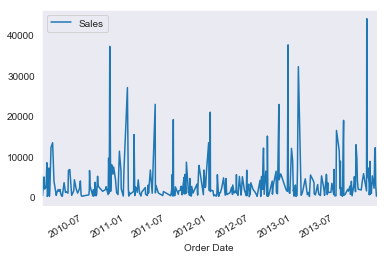

In [98]:
q3= pd.DataFrame(dd2.Sales, dd2.index )
q3.plot(kind='line')

# Question 4: Create a Forecast of Sales using 2012 and 2013 Sales Data


- Use prophet
- Use the dataset that you created in Question 2 and plotted in Question 3
- add 1 extra day to the dataset (we saw this in class and is well documented on prophet tutorials)
- Generate the forecasts 


- Plot the model

In [15]:
dd2 = dd2.reset_index()
dd3 = dd2[['Order Date','Sales']]
dd3.columns = ["ds", "y"]

# create a model using prophet
model = Prophet(daily_seasonality=True)
model.fit(dd3)

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [16]:
future = model.make_future_dataframe(periods=1, freq='D', include_history=True)
dd3_forecasts = model.predict(future)

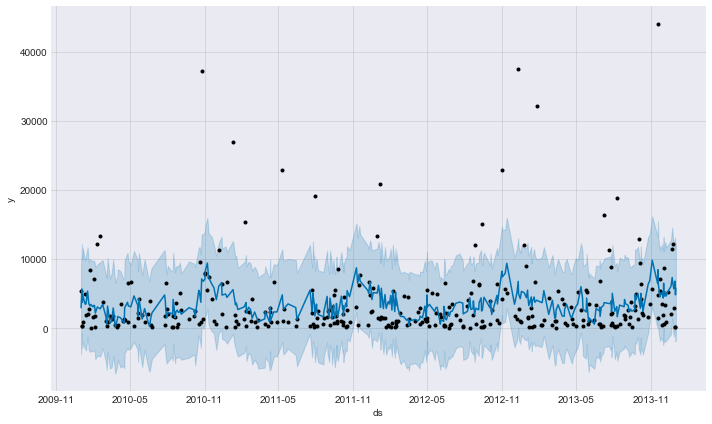

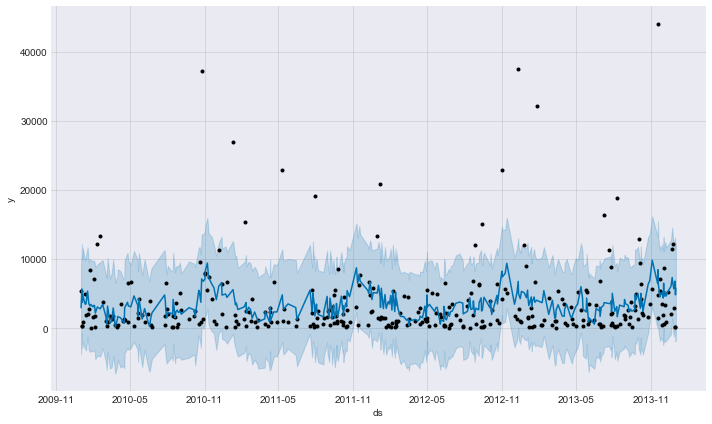

In [17]:
model.plot(dd3_forecasts)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
330,2013-12-30,5617.524133,511.367181,13513.000295,5617.524133,5617.524133,1196.769476,1196.769476,1196.769476,-1694.206965,-1694.206965,-1694.206965,1563.966627,1563.966627,1563.966627,1327.009814,1327.009814,1327.009814,0.0,0.0,0.0,6814.293609
331,2013-12-31,5618.050065,-1421.088042,11544.114858,5618.050065,5618.050065,-780.510587,-780.510587,-780.510587,-1694.206965,-1694.206965,-1694.206965,-325.713516,-325.713516,-325.713516,1239.409894,1239.409894,1239.409894,0.0,0.0,0.0,4837.539478
332,2014-01-01,5618.575998,-325.814004,12094.427518,5618.575998,5618.575998,195.861875,195.861875,195.861875,-1694.206965,-1694.206965,-1694.206965,736.222405,736.222405,736.222405,1153.846435,1153.846435,1153.846435,0.0,0.0,0.0,5814.437873


# Question 5: What is the forecasted Sales for the Chairs & Chairmats Sub-Category on Jan 1, 2014?

In [21]:
dd3_forecasts.yhat.tail(1)

332    5814.437873
Name: yhat, dtype: float64